In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
num_classes = 3


In [3]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)


In [4]:
train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

Found 1073 images belonging to 3 classes.


In [5]:
valid_datagen = ImageDataGenerator(
    rescale=1.0/255)

In [6]:
valid_generator = valid_datagen.flow_from_directory(
    'data/test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

Found 323 images belonging to 3 classes.


In [7]:
num_classes = 3

In [8]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

C:\Users\sneha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history_cnn = cnn_model.fit(
    train_generator,
    epochs=20,
    validation_data=valid_generator
)

C:\Users\sneha\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 144s 4s/step - accuracy: 0.3956 - loss: 1.3754 - val_accuracy: 0.6316 - val_loss: 0.7850
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 117s 3s/step - accuracy: 0.6319 - loss: 0.7610 - val_accuracy: 0.6966 - val_loss: 0.6190
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 112s 3s/step - accuracy: 0.6061 - loss: 0.7480 - val_accuracy: 0.6811 - val_loss: 0.6788
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.6553 - loss: 0.7023 - val_accuracy: 0.6749 - val_loss: 0.5551
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 110s 3s/step - accuracy: 0.6420 - loss: 0.6854 - val_accuracy: 0.7121 - val_loss: 0.5309
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.6686 - loss: 0.6582 - val_accuracy: 0.7121 - val_loss: 0.5487
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.6897 - loss: 0.6328 - val_accuracy: 0.7430 - val_loss: 0.5054
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.6863 - loss: 0.6283 - val_accuracy: 0.7337 - v

In [10]:
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(valid_generator)
print(f'CNN Test accuracy: {cnn_test_accuracy}')
cnn_model.save("model_cnn.h5")

11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 638ms/step - accuracy: 0.8500 - loss: 0.3993


CNN Test accuracy: 0.8637771010398865


In [11]:
from skimage.io import imread
from skimage.transform import resize
import os
import numpy as np

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

dataset_path = 'data/train'
image_size = (64, 64)
images = []
labels = []

for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            if file.endswith('.jpg') or file.endswith('.png'):
                image_path = os.path.join(folder_path, file)
                image = imread(image_path, as_gray=True)
                image_resized = resize(image, image_size)
                images.append(image_resized.flatten())
                labels.append(folder)

images = np.array(images)
labels = np.array(labels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Train SVM
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Evaluate
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


C:\Users\Admin\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


Accuracy: 98.14%


In [12]:
print(f'CNN Test Accuracy: {cnn_test_accuracy}')
print(f'SVM Test Accuracy: {accuracy}')



CNN Test Accuracy: 0.9040247797966003
SVM Test Accuracy: 0.9813953488372092


Text(0.5, 1.0, 'CNN Training and Validation Accuracy')

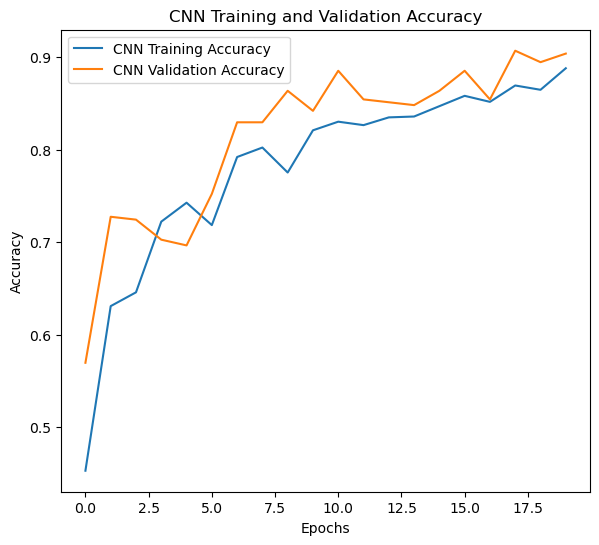

In [13]:
plt.figure(figsize=(15, 6))

# Accuracy curves
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='CNN Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Training and Validation Accuracy')

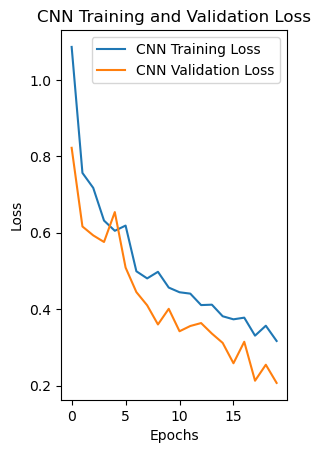

In [14]:
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='CNN Training Loss')
plt.plot(history_cnn.history['val_loss'], label='CNN Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('CNN Training and Validation Loss')

plt.show()

In [15]:
import joblib

# Save the SVM model
joblib.dump(svm_classifier, 'svm_model.pkl')
print("SVM model saved successfully.")

SVM model saved successfully.


In [45]:
# After loading the training data and before fitting the SVM model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train SVM with the scaled data
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Save the trained SVM and scaler
joblib.dump(svm_classifier, 'svm_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

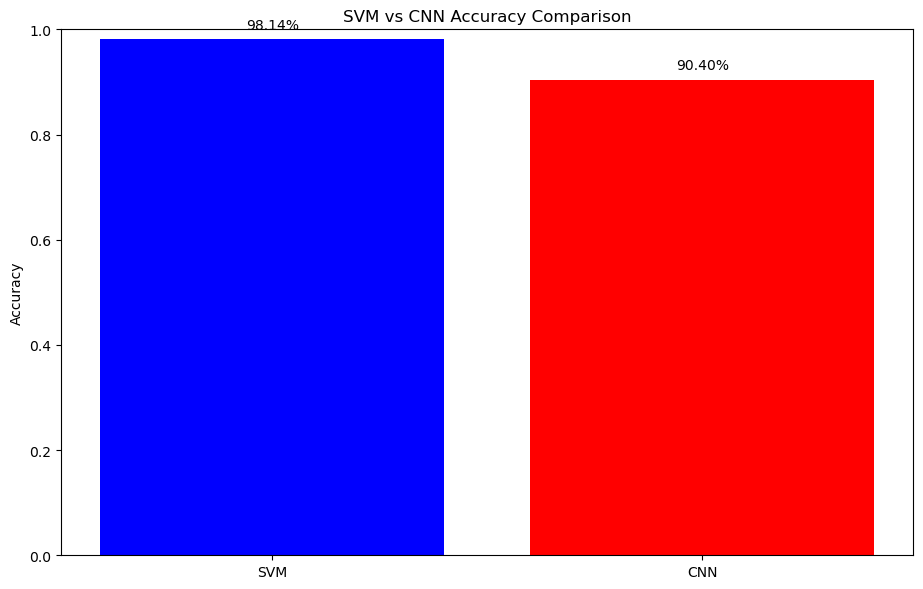

In [44]:
plt.figure(figsize=(18, 6))

# Plot SVM and CNN Accuracy Comparison
plt.subplot(1, 2, 2)
models = ['SVM', 'CNN']
accuracies = [accuracy, cnn_test_accuracy]
plt.bar(models, accuracies, color=['blue', 'red'])
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Scale to 0-1 since accuracies are percentages/ratios
plt.title('SVM vs CNN Accuracy Comparison')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v * 100:.2f}%", ha='center')

plt.tight_layout()
plt.show()
